In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
len(df)

150

In [5]:
df.shape

(150, 6)

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


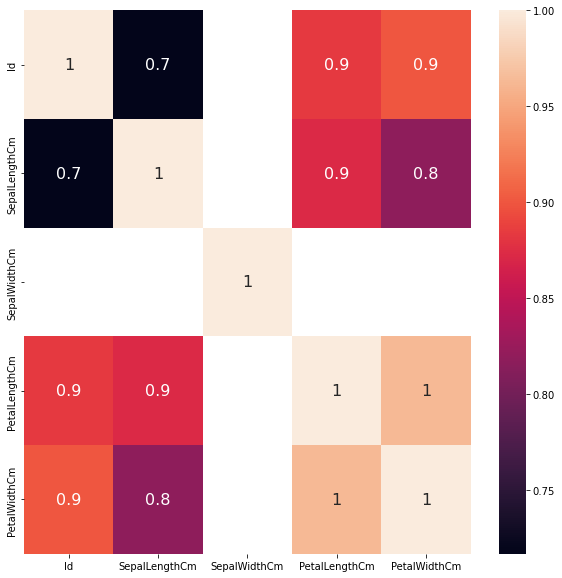

In [8]:
M = df.corr()[df.corr() > .5]
plt.figure(figsize=(10,10))
sns.heatmap(M, annot=True, fmt='.1g', annot_kws={'fontsize':16})

plt.show()

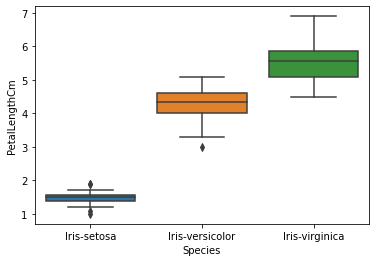

In [9]:
sns.boxplot(x="Species",y="PetalLengthCm",data=df)
plt.show()

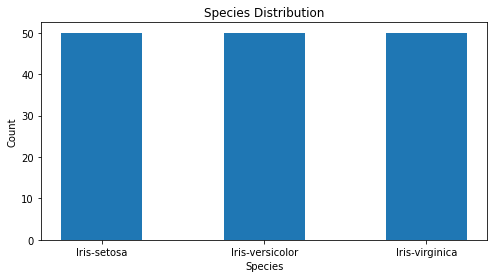

In [10]:
cat_col = df.select_dtypes(include='object').columns
for i, column in enumerate(cat_col):
    counts = df[column].value_counts()
    plt.figure(figsize=(8,4))
    plt.bar(counts.index, counts.values,width=0.5)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('{} Distribution'.format(column))

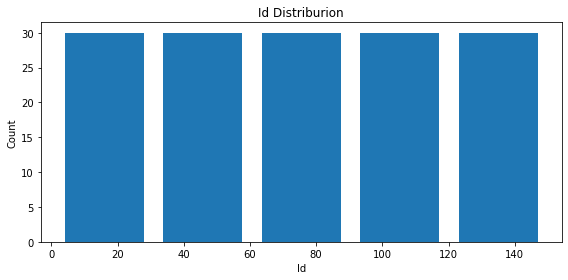

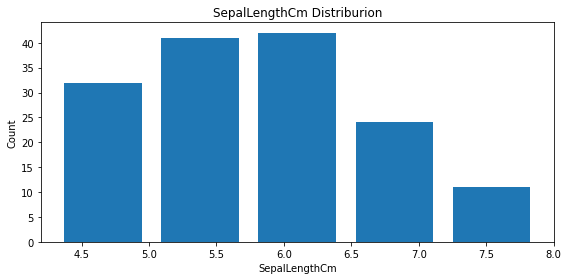

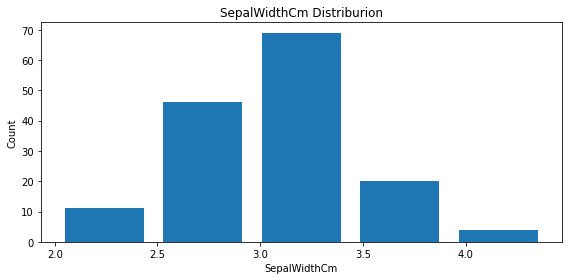

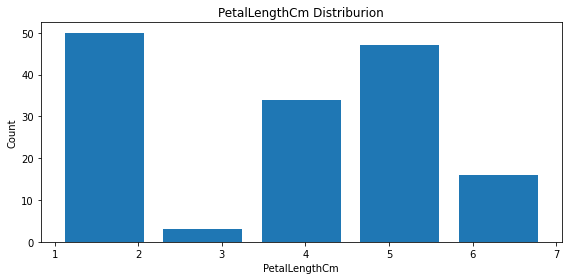

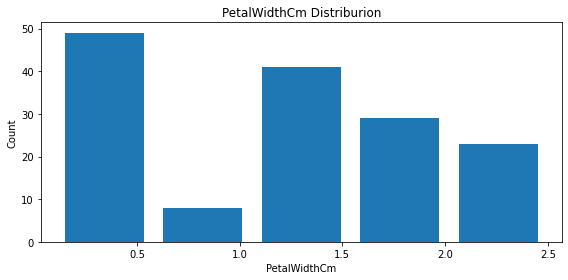

In [11]:
num_col = df.select_dtypes(exclude='object').columns
for i, column in enumerate(num_col):
    plt.figure(figsize=(8,4))
    plt.hist(df[column],bins=5, rwidth=0.8)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('{} Distriburion'.format(column))
    plt.tight_layout()
    plt.show()

In [12]:
df_outcome = pd.crosstab(index=df["Species"],  # Make a crosstab
                              columns="count")
df_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


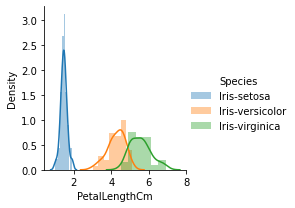

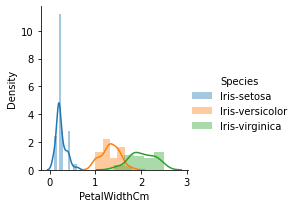

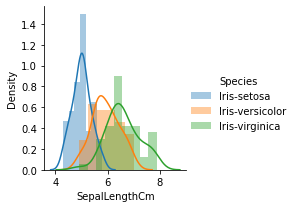

In [13]:
sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()
sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()


In [14]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [15]:
df['Species'] = df['Species'].replace({'Iris-setosa':0 ,'Iris-versicolor': 1, '': 2, 'Iris-virginica': 3,})

In [16]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [17]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

In [18]:
transformed = pca.transform(df)
transformed.shape

(150, 2)

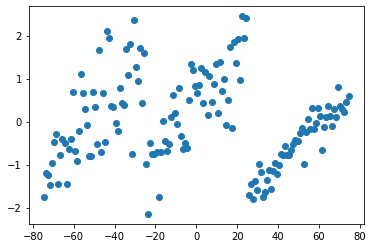

In [19]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys)
plt.show()

In [20]:
kmeans= KMeans(n_clusters=2)

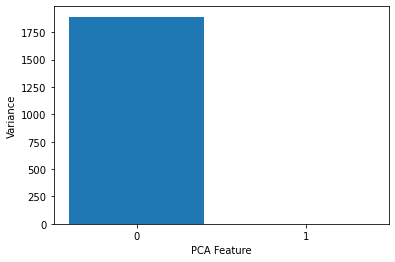

In [21]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(pca,kmeans)
model_pipeline = pipeline.fit(df)

features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()

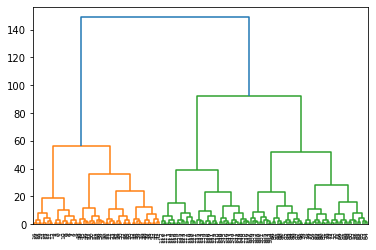

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(df,method='complete')
dendrogram(mergings,leaf_rotation=90,leaf_font_size=6)
plt.show()